In [19]:
%matplotlib inline

In [20]:
import array

import random
import numpy as np

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp

import operator
import math

import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

import networkx as nx

In [56]:
class RegexNode(object):
    def __init__(self):
        self.left = None
        self.right = None
    
    @staticmethod
    def create2(left, right):
        rn = RegexNode()
        rn.left = left
        rn.right = right
        return rn
    
    @staticmethod
    def create1(value):
        rn = RegexNode()
        rn.left = value
        rn.right = None
        return rn
    
    def get_value(self):
        return self.left + self.right
    
    
class RegexSymbol(RegexSymbol):
    def __init__(self):
        self.value = None
        
    @staticmethod
    def create(value):
        rc = RegexSymbol()
        rc.value = value
        return rc

    def get_value(self):
        return self.value
    

class RegexSymbolsFactory():
    @staticmethod
    def create_UpperLetters():
        return RegexSymbol.create("A-Z")
    
    @staticmethod
    def create_Digits():
        return RegexSymbol.create("0-9")
    
    @staticmethod
    def create_LowerLetters():
        return RegexSymbol.create("a-z")

In [57]:
pset = gp.PrimitiveSetTyped("main", [], RegexNode)

pset.addPrimitive(RegexNode.create2, [RegexNode, RegexNode], RegexNode, "CreateNode2")
pset.addPrimitive(RegexNode.create1, [RegexNode], RegexNode, "CreateNode1")

pset.addPrimitive(RegexSymbol_Letters.create, [], RegexNode, "Letters")
pset.addTerminal(RegexSymbol_Letters.create(), RegexNode, "LettersT")

In [58]:
creator.create("Fitness", base.Fitness, weights=(1.0, -1.0))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.Fitness)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genFull, pset=pset, min_=3, max_=5)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

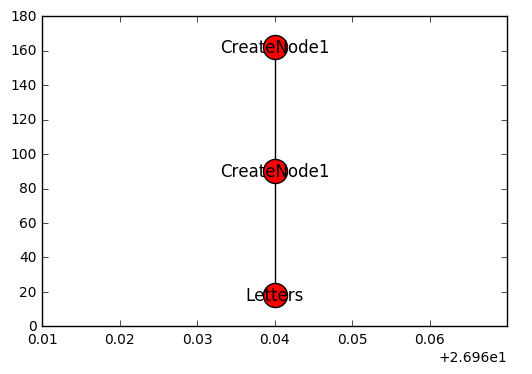

In [59]:
expr = toolbox.individual()
draw_tree(expr)

In [53]:
def draw_tree(expr):
    nodes, edges, labels = gp.graph(expr)
    g = nx.Graph()
    g.add_nodes_from(nodes)
    g.add_edges_from(edges)
    pos = graphviz_layout(g, prog="dot")

    nx.draw_networkx_nodes(g, pos)
    nx.draw_networkx_edges(g, pos)
    nx.draw_networkx_labels(g, pos, labels)
    plt.show()

In [ ]:
class RegexGroup(RegexNode):
    pass


class RegexOperator(RegexNode):
    pass
       

class RegexRangeNode(RegexNode):
    def __init__(self):
        self.left = None
        self.right = None
    
    @staticmethod
    def create(left, right):
        rn = RegexRangeNode()
        rn.left = value
        rn.right = right
        return rn
      